**Data viewer**

View GemPy input data to check for reasonableness.
<br>Input file must be a csv including (but not limited to) the following columns:
<br> - X: x coordinates of data points
<br> - Z: z coordinates (elevation) of data points
<br> - formation: string indicating the formation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline            

In [2]:
filename = 'GK_interfaces_detailedinfo.csv'    #data file to view
interfaces = pd.read_csv(filename)             #import csv to pandas dataframe
interfaces.head()                              #preview first few rows


,xsec,ID,X,Y,xsec surface,xsec bottom 1,thickness from surface to point,Z surface elev (from DEM),Z,formation,num,info,surface elev diff (DEM - Goldscheider)
0,AB,AB-10a,583905.77,5247005.54,NaN,NaN,NaN,1816,1817,Garschella,2,Goldscheider xsec AB,NaN
1,AB,AB-10b,583905.77,5247005.54,1835.0,1740.0,95.0,1816,1721,Schrattenkalk,3,Goldscheider xsec AB,19.0
2,AB,AB-10c,583905.77,5247005.54,1835.0,1525.0,310.0,1816,1506,Drusberg,4,Goldscheider xsec AB,19.0
3,AB,AB-11,584001.68,5247223.82,1855.0,1535.0,320.0,1846,1526,Drusberg,4,Goldscheider xsec AB,9.0
4,AB,AB-12a,584124.05,5247498.33,NaN,NaN,NaN,1938,1939,Garschella,2,Goldscheider xsec AB,NaN


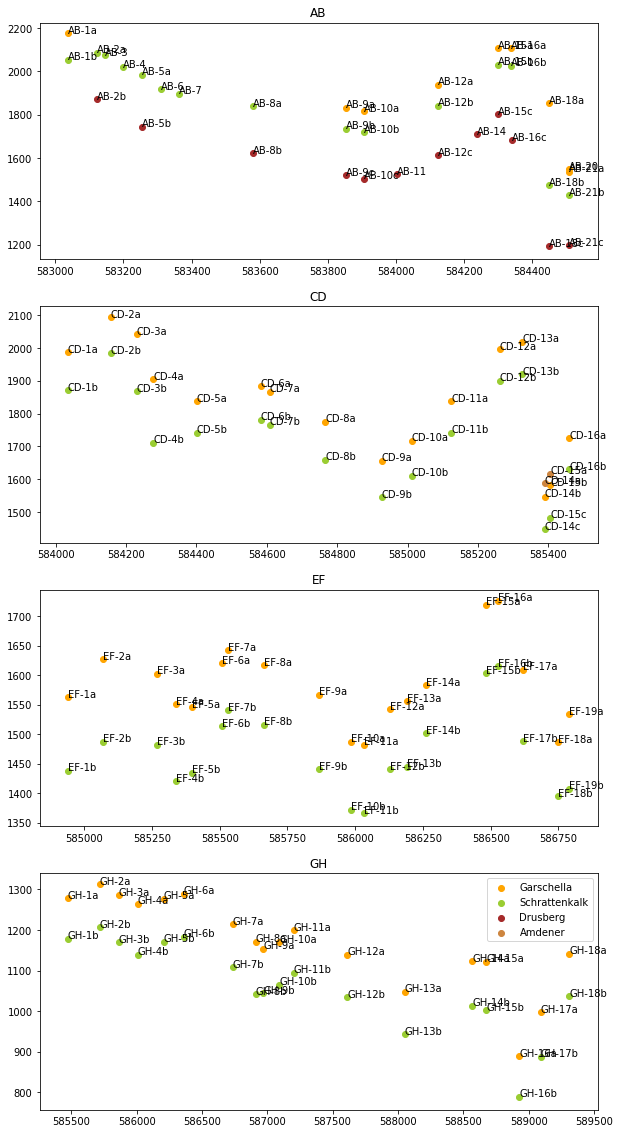

In [3]:
formations = interfaces.formation.unique()          #get list of formation names
xsecs = interfaces.xsec.unique()                    #get list of xsec names
colors = {'Amdener':'peru',
          'Garschella':'orange',
          'Schrattenkalk':'yellowgreen',
          'Drusberg':'brown'}                       #make dictionary of colors to plot with

f1,ax1 = plt.subplots(len(xsecs),1,figsize=(10,20))         #create fig and axes (one per xsec)

for i in range(len(xsecs)):                                 #loop over xsections
    subset = interfaces[interfaces.xsec==xsecs[i]]          #select subset of dataframe from current section
    ax = ax1[i]
    ax.set_title(xsecs[i])
    for j in range(len(formations)):                       #loop over formations
        X = subset.X[interfaces.formation==formations[j]]  #get x values for current formation 
        Z = subset.Z[interfaces.formation==formations[j]]  #get z values
        IDs = subset.ID[interfaces.formation==formations[j]]
        ax.scatter(X,Z,color=colors[formations[j]])
        for k in X.index:
            ax.annotate(IDs[k],xy=(X[k],Z[k]))
    
plt.legend(formations)
   

In [7]:
filename = 'GK_orientations_strikedip_detailedinfo.csv'    #data file to view
orientations = pd.read_csv(filename)             #import csv to pandas dataframe
orientations.head()                              #preview first few rows

,ID,num,X,Y,Z,use?,azimuth,dip,polarity,formation,source,notes
0,SD-1,1,583887.38,5247073.02,1833,n,330,11,1,Amdener,Goldscheider 1997,NaN
1,SD-2,2,584989.63,5248080.87,1758,n,310,88,1,Amdener,Goldscheider 1997,NaN
2,SD-3,3,585237.28,5248307.36,1765,n,120,26,1,Amdener,Goldscheider 1997,NaN
3,SD-4,4,585592.88,5248089.34,1640,n,110,32,1,Amdener,Goldscheider 1997,NaN
4,SD-5,5,586046.49,5247835.34,1589,n,290,69,1,Amdener,Goldscheider 1997,NaN


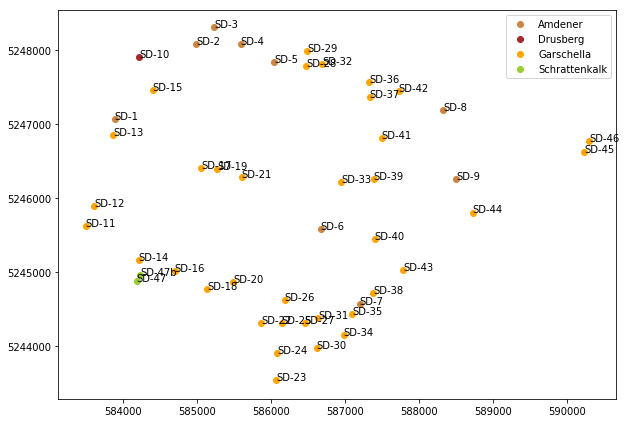

In [17]:
formations = orientations.formation.unique()        #get list of formation names
colors = {'Amdener':'peru',
          'Garschella':'orange',
          'Schrattenkalk':'yellowgreen',
          'Drusberg':'brown'}                       #make dictionary of colors to plot with

f2,ax2 = plt.subplots(1,1,figsize=(10,20))          #create fig and axes 
ax2.set_aspect('equal')
for j in range(len(formations)):                       #loop over formations
    X = orientations.X[orientations.formation==formations[j]]  #get x values for current formation 
    Y = orientations.Y[orientations.formation==formations[j]]  #get y values
    IDs = orientations.ID[orientations.formation==formations[j]]
    ax2.scatter(X,Y,color=colors[formations[j]])
    for k in X.index:
        ax2.annotate(IDs[k],xy=(X[k],Y[k]))
plt.legend(formations)